In [1]:
import gym
import numpy as np
import time
from Reinforcement_Learning.SARSA.Sarsa import Sarsa
import matplotlib.pyplot as plt

In [2]:
env=gym.make("FrozenLake-v1", is_slippery=True)
sarsa = Sarsa(env, 0.001, 0.9, epsilon=0.1)
env.reset()

(0, {'prob': 1})

c:\Users\joeag\Documents\venvs\ml-env\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Learnt Policy: [2 3 1 3 0 0 2 0 3 1 0 0 0 2 2 0]


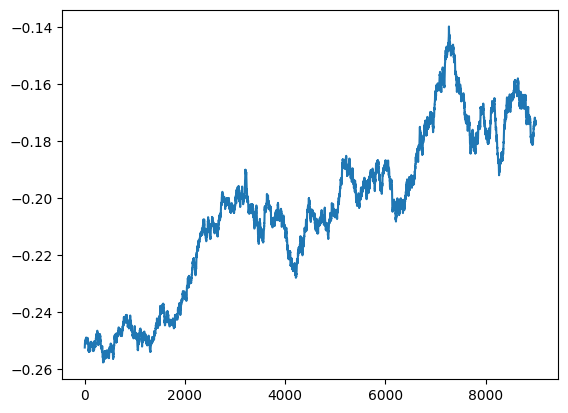

In [3]:
rewards = sarsa.train(10000)
print(f"Learnt Policy: {sarsa.policy}")

# make moving average of rewards
rewards = np.convolve(rewards, np.ones(1000), 'valid') / 1000
plt.plot(rewards)

In [4]:
#  Evaluate. Max Reward = 1.0
total_rewards = []
for i in range(50000):
    total_reward = 0.0
    state = env.reset()[0]
    done = False
    while not done:
        action = sarsa.act(state)
        state, reward, done, _, _ =env.step(action)
        total_reward += reward
        # env.render()
        # time.sleep(2)
    total_rewards.append(reward)

print(f"mean reward: {np.array(total_rewards).mean()}")

mean reward: 0.45028


In [5]:
env.close()